Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/ecommerce_sales_analysis.csv")
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [ ]:
df.shape


(1000, 18)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [ ]:
df.columns.to_list()


['product_id',
 'product_name',
 'category',
 'price',
 'review_score',
 'review_count',
 'sales_month_1',
 'sales_month_2',
 'sales_month_3',
 'sales_month_4',
 'sales_month_5',
 'sales_month_6',
 'sales_month_7',
 'sales_month_8',
 'sales_month_9',
 'sales_month_10',
 'sales_month_11',
 'sales_month_12']

In [ ]:
# Summary statistics for price, review_score, and review_count
summary_stats = df[['price', 'review_score', 'review_count']].describe()

# Summary statistics for monthly sales
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
sales_summary_stats = df[sales_columns].describe()

print("Summary Statistics for Price, Review Score, and Review Count:")
print(summary_stats)
print("\nSummary Statistics for Monthly Sales:")
sales_summary_stats

Summary Statistics for Price, Review Score, and Review Count:
             price  review_score  review_count
count  1000.000000   1000.000000   1000.000000
mean    247.677130      3.027600    526.506000
std     144.607983      1.171243    282.269932
min       7.290000      1.000000      1.000000
25%     121.810000      2.000000    283.750000
50%     250.920000      3.100000    543.000000
75%     373.435000      4.000000    772.000000
max     499.860000      5.000000    999.000000

Summary Statistics for Monthly Sales:


,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


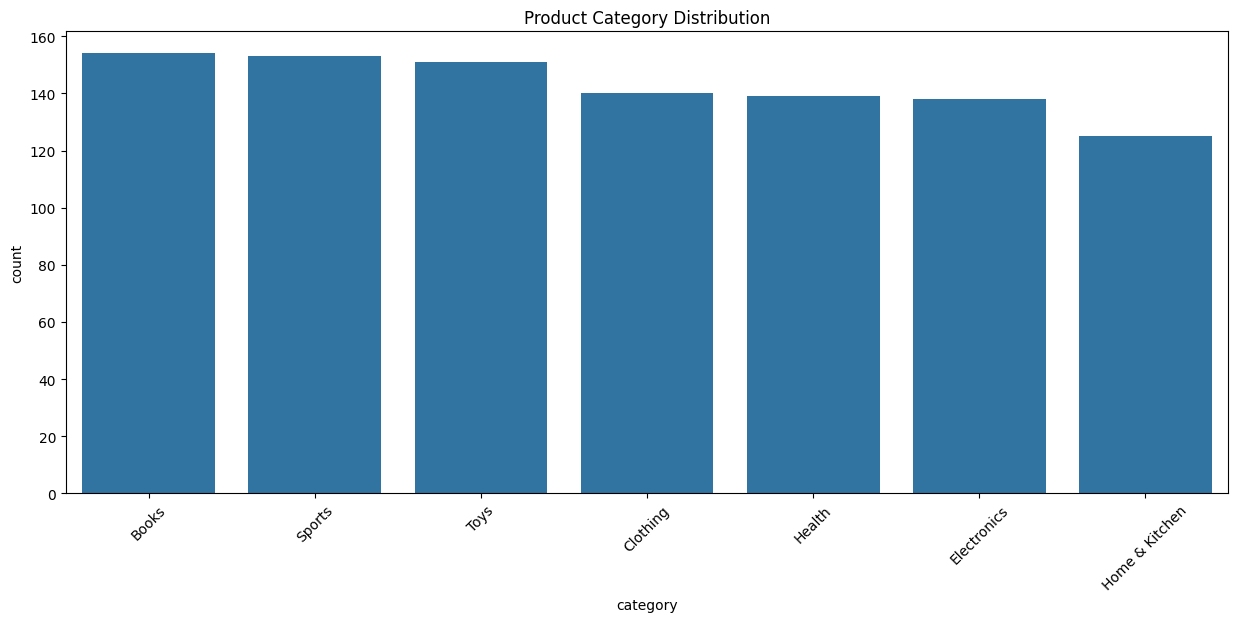

In [ ]:
# Category distribution
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

Calculate the total sales for each product across all months.



In [ ]:
# Calculate total sales for each product
df['total_sales'] = df[sales_columns].sum(axis=1)

# Summary statistics for total sales
total_sales_summary = df['total_sales'].describe()

print("Summary Statistics for Total Sales:")
print(total_sales_summary)


Summary Statistics for Total Sales:
count    1000.000000
mean     6019.912000
std       992.273787
min      2972.000000
25%      5392.000000
50%      5992.000000
75%      6680.000000
max      9151.000000
Name: total_sales, dtype: float64


3. Sales Analysis


Monthly Sales Trend


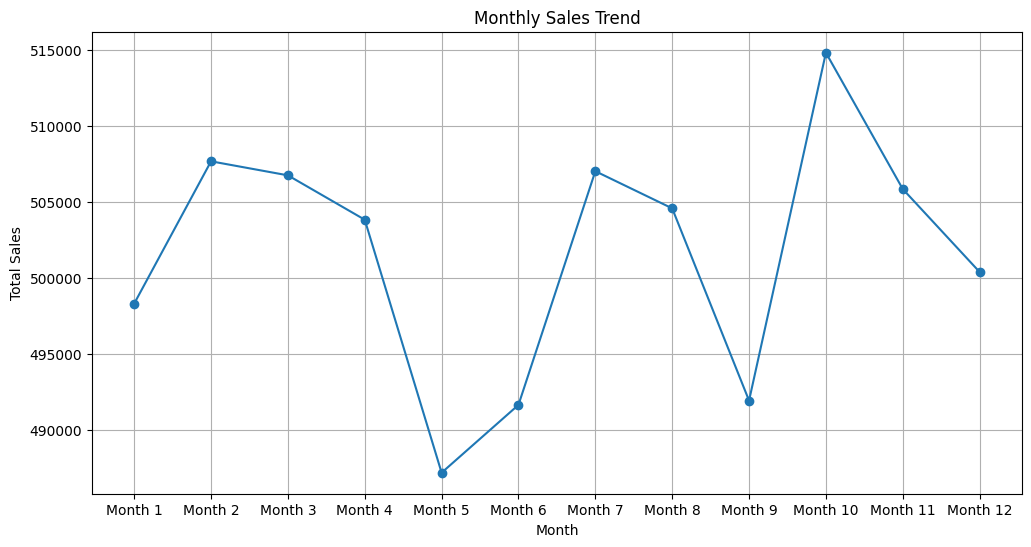

In [ ]:
# Calculate monthly sales
monthly_sales = df[sales_columns].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), [f'Month {i}' for i in range(1, 13)])
plt.grid(True)
plt.show()


1. Top Products by Total Sales


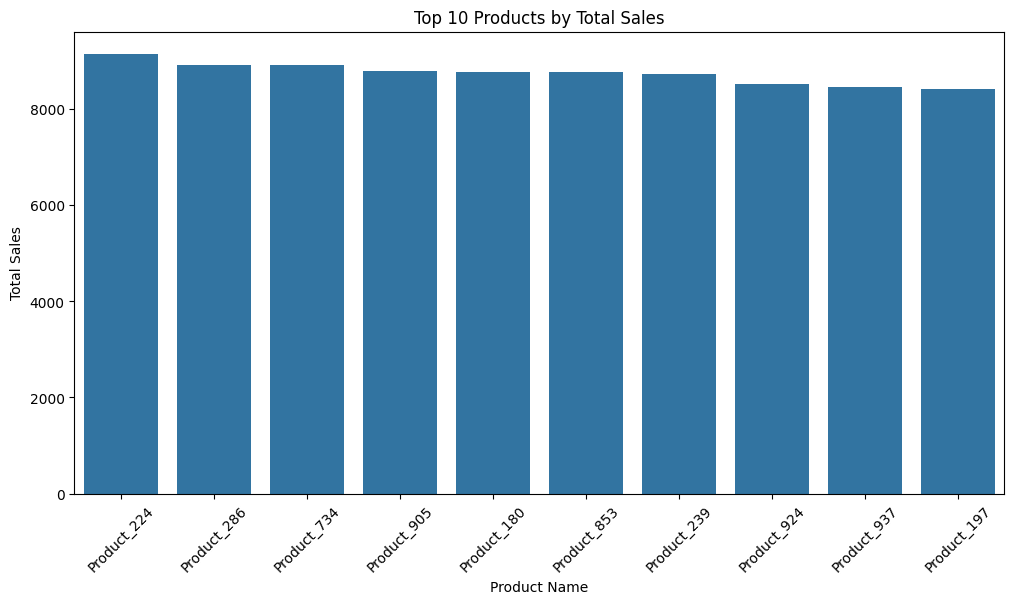

In [ ]:
# Top products by total sales
top_products = df.nlargest(10, 'total_sales')

# Plot top products by total sales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='product_name', y='total_sales')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


2. Sales by Category


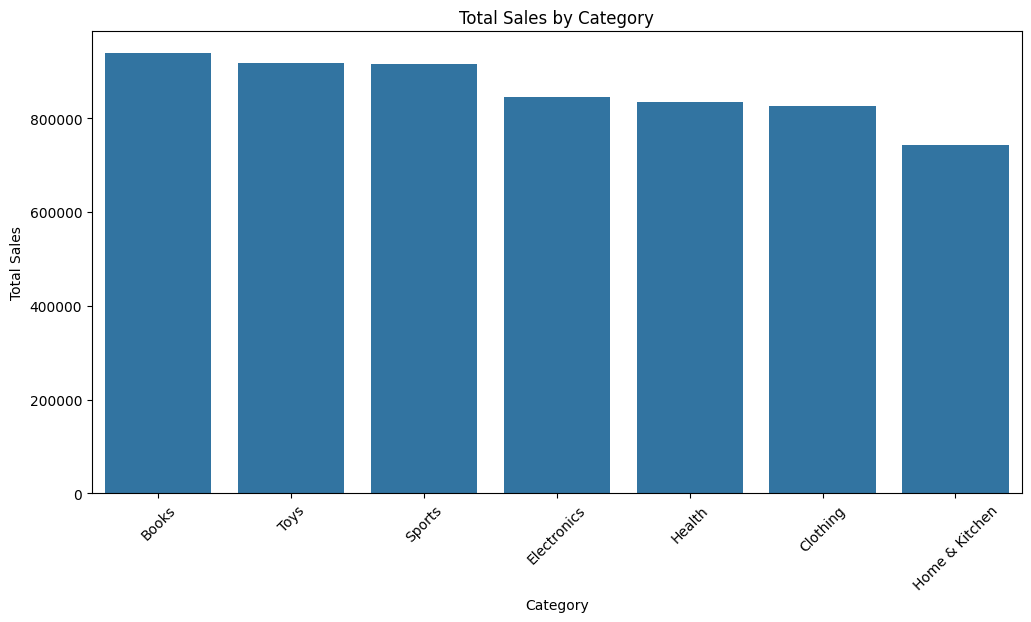

In [ ]:
# Sales by category
sales_by_category = df.groupby('category')['total_sales'].sum().reset_index()

# Plot sales by category
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_category, x='category', y='total_sales', order=sales_by_category.sort_values('total_sales', ascending=False)['category'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


3. Average Monthly Sales by Category


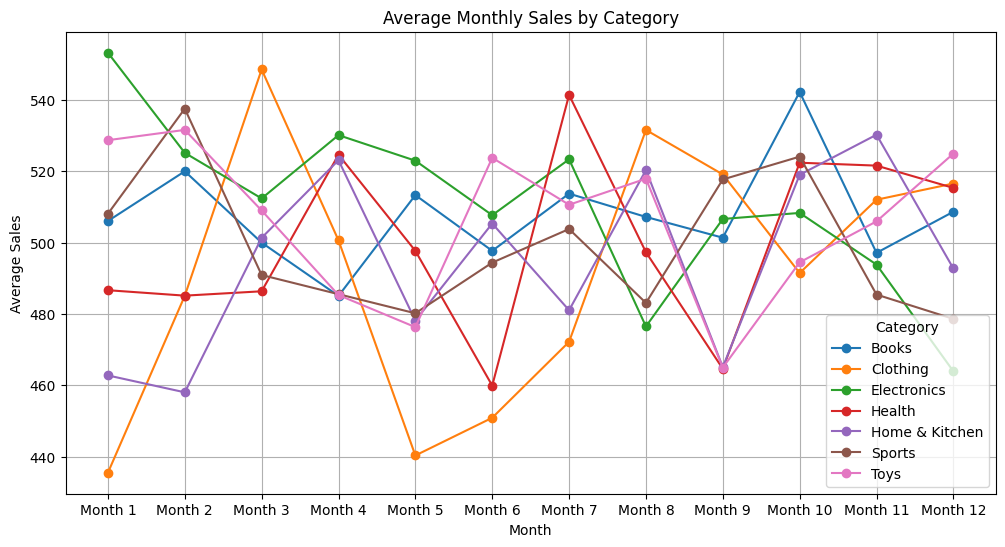

In [ ]:
# Average monthly sales by category
monthly_sales_by_category = df.groupby('category')[sales_columns].mean().reset_index()

# Plot average monthly sales by category
plt.figure(figsize=(12, 6))
for category in monthly_sales_by_category['category']:
    category_sales = monthly_sales_by_category[monthly_sales_by_category['category'] == category][sales_columns].values.flatten()
    plt.plot(range(1, 13), category_sales, marker='o', label=category)

plt.title('Average Monthly Sales by Category')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), [f'Month {i}' for i in range(1, 13)])
plt.legend(title='Category')
plt.grid(True)
plt.show()


Review Analysis


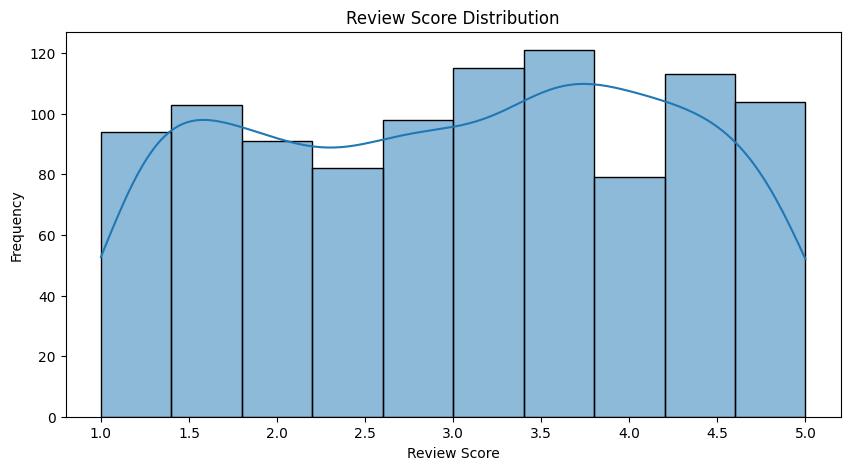

In [ ]:
# Review score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['review_score'], bins=10, kde=True)
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


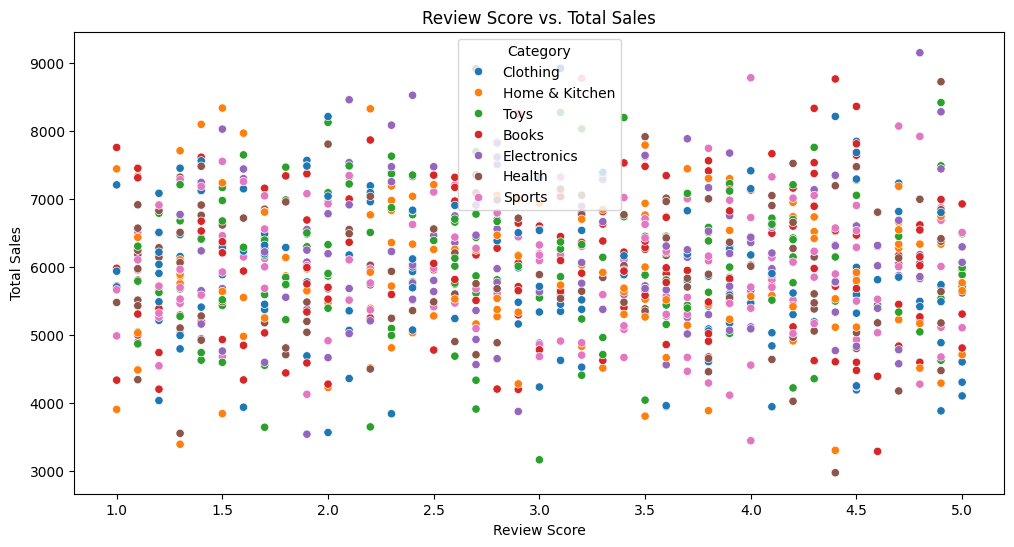

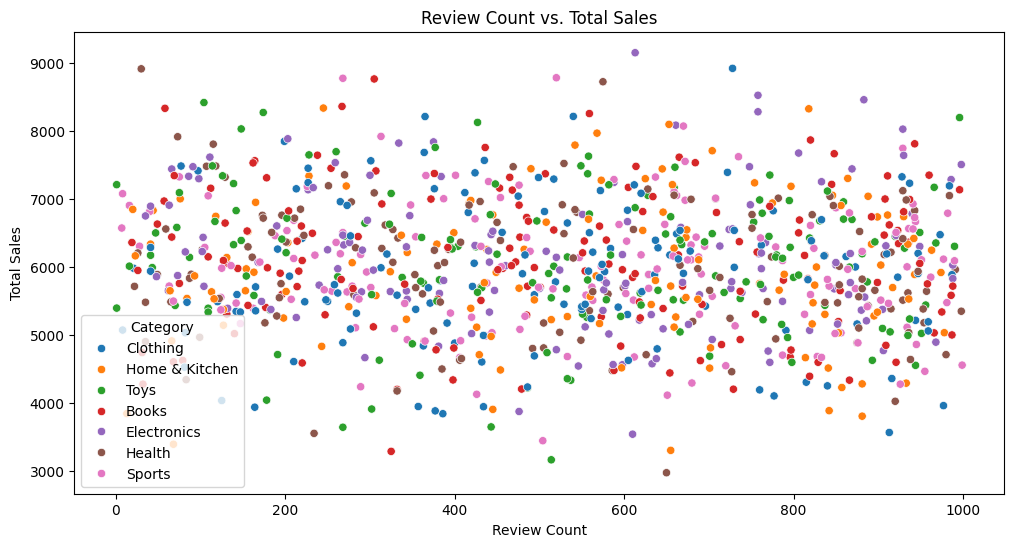

In [ ]:
# Scatter plot for review score vs. total sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='review_score', y='total_sales', hue='category')
plt.title('Review Score vs. Total Sales')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()

# Scatter plot for review count vs. total sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='review_count', y='total_sales', hue='category')
plt.title('Review Count vs. Total Sales')
plt.xlabel('Review Count')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()


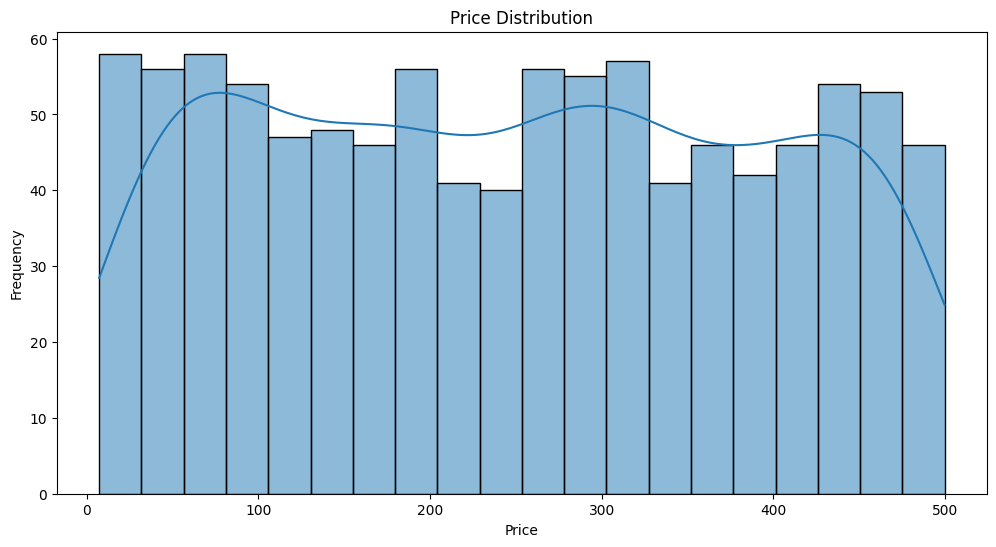

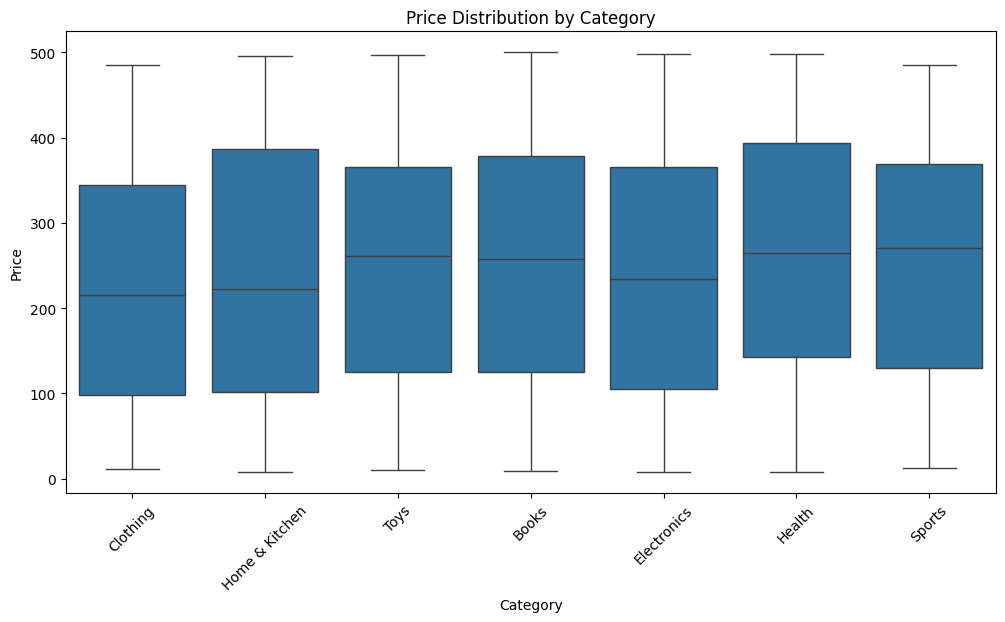

In [ ]:
# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


Correlation between Price and Sales


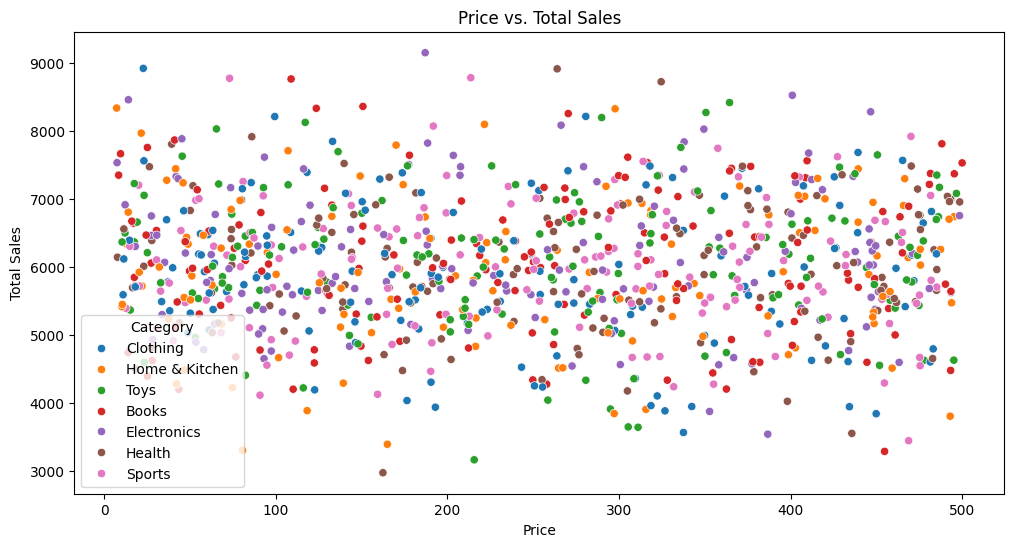

In [ ]:
# Scatter plot for price vs. total sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='total_sales', hue='category')
plt.title('Price vs. Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()


6. Comprehensive Sales Analysis


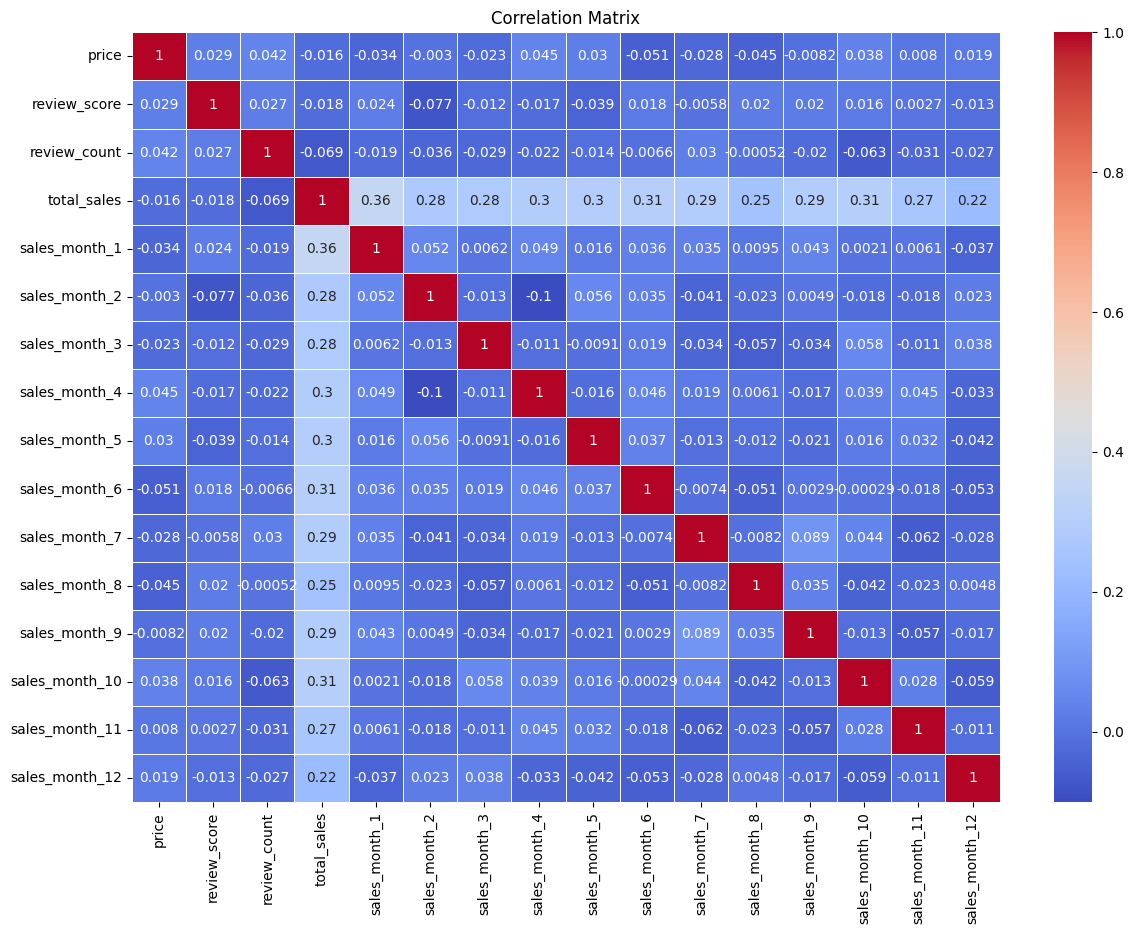

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['price', 'review_score', 'review_count', 'total_sales'] + sales_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

6.2. Category-wise Sales Trend Analysis



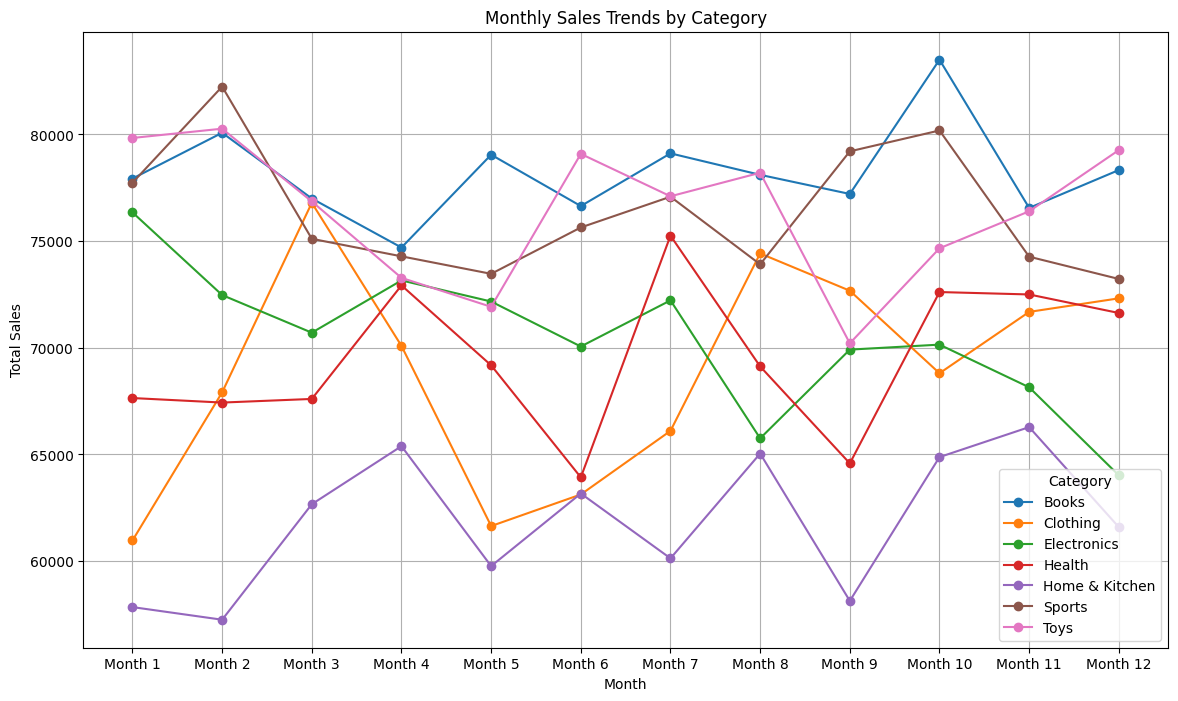

In [ ]:
# Monthly sales by category
monthly_sales_by_category = df.groupby('category')[sales_columns].sum().transpose()

# Plot monthly sales trends by category
plt.figure(figsize=(14, 8))
for category in monthly_sales_by_category.columns:
    plt.plot(monthly_sales_by_category.index, monthly_sales_by_category[category], marker='o', label=category)

plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), [f'Month {i}' for i in range(1, 13)])
plt.legend(title='Category')
plt.grid(True)
plt.show()


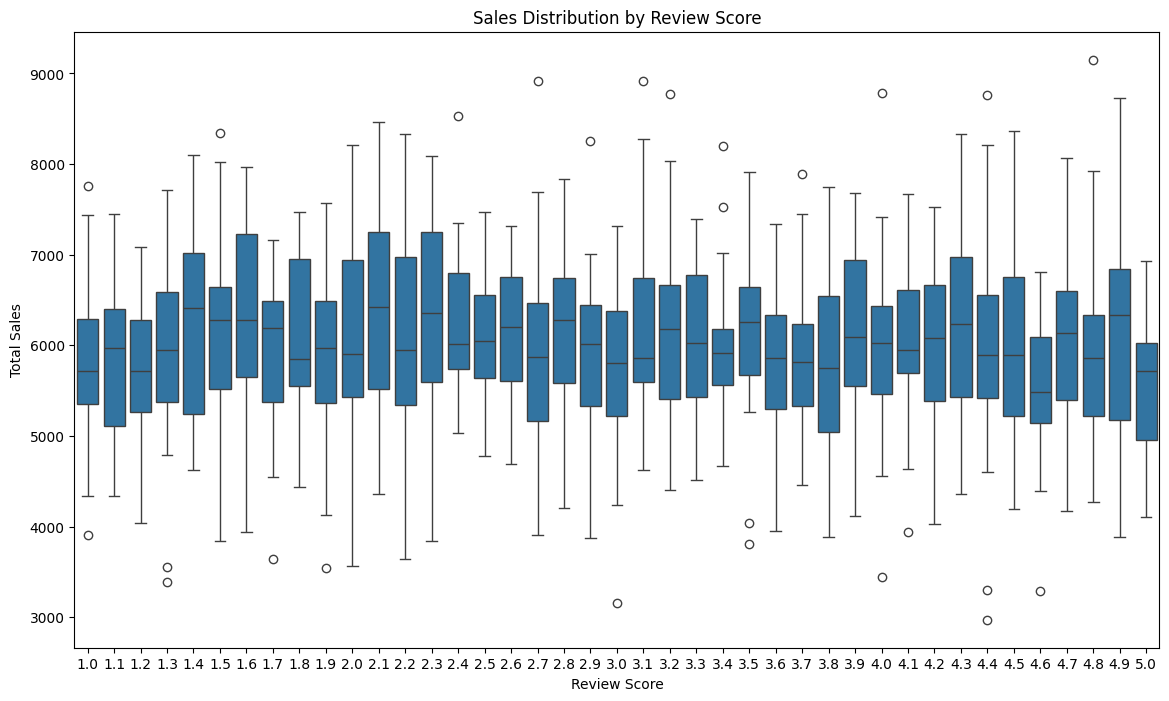

In [ ]:
# Sales distribution by review score
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='review_score', y='total_sales')
plt.title('Sales Distribution by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.show()


Sales Distribution by Price Range


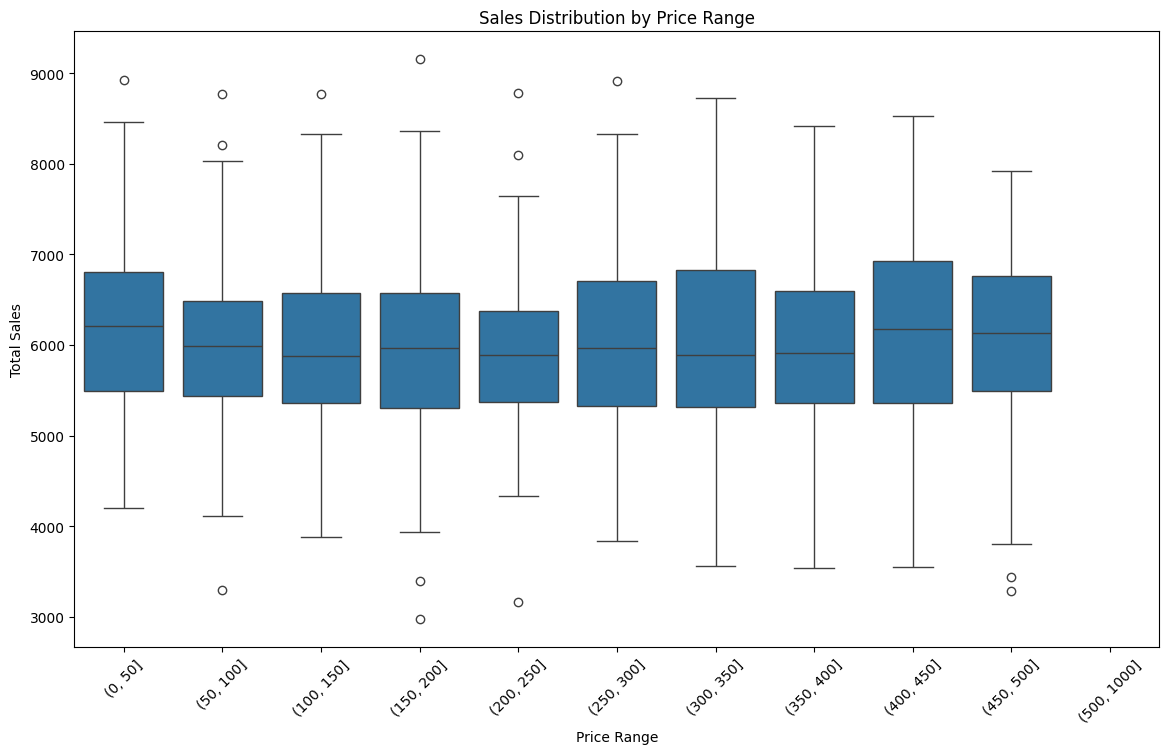

In [ ]:
# Define price ranges
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
df['price_range'] = pd.cut(df['price'], bins=price_bins)

# Sales distribution by price range
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='price_range', y='total_sales')
plt.title('Sales Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


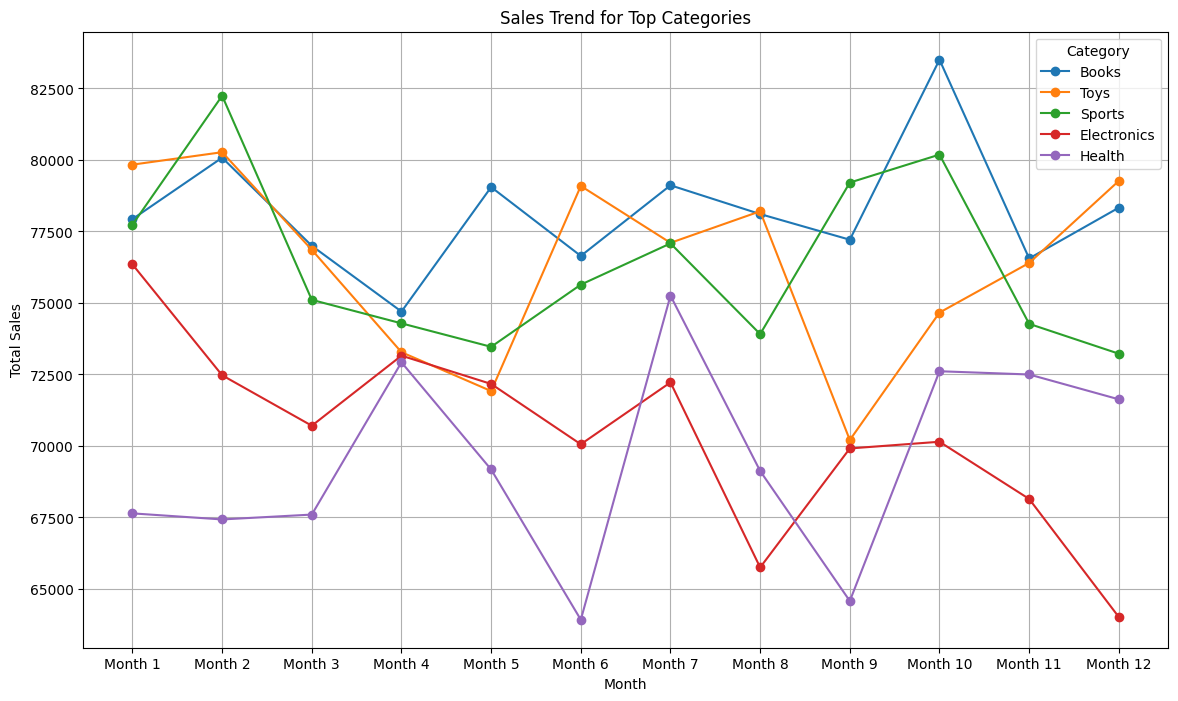

In [ ]:
# Top categories by total sales
top_categories = df.groupby('category')['total_sales'].sum().nlargest(5).index

# Filter data for top categories
top_categories_data = df[df['category'].isin(top_categories)]

# Sales trend for top categories
plt.figure(figsize=(14, 8))
for category in top_categories:
    category_sales = top_categories_data[top_categories_data['category'] == category][sales_columns].sum()
    plt.plot(range(1, 13), category_sales, marker='o', label=category)

plt.title('Sales Trend for Top Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), [f'Month {i}' for i in range(1, 13)])
plt.legend(title='Category')
plt.grid(True)
plt.show()


7.1 Predicting Future Sales


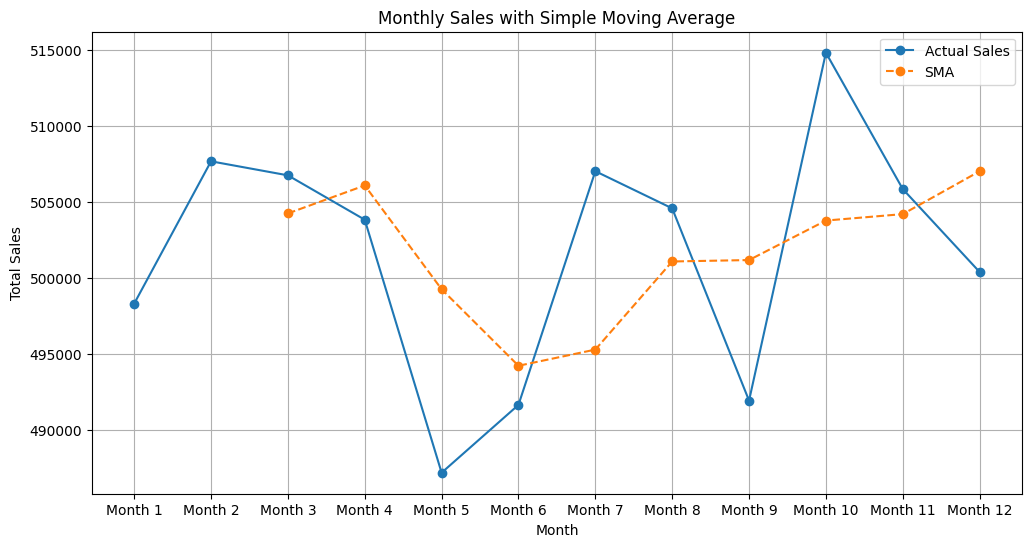

In [ ]:
# Calculate monthly total sales
monthly_sales = df[sales_columns].sum()

# Calculate Simple Moving Average (SMA)
window_size = 3
monthly_sales_sma = monthly_sales.rolling(window=window_size).mean()

# Plot the actual sales and SMA
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', marker='o')
plt.plot(monthly_sales.index, monthly_sales_sma, label='SMA', linestyle='--', marker='o')
plt.title('Monthly Sales with Simple Moving Average')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), [f'Month {i}' for i in range(1, 13)])
plt.legend()
plt.grid(True)
plt.show()



*   7.2. Advanced Predictive Modeling




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


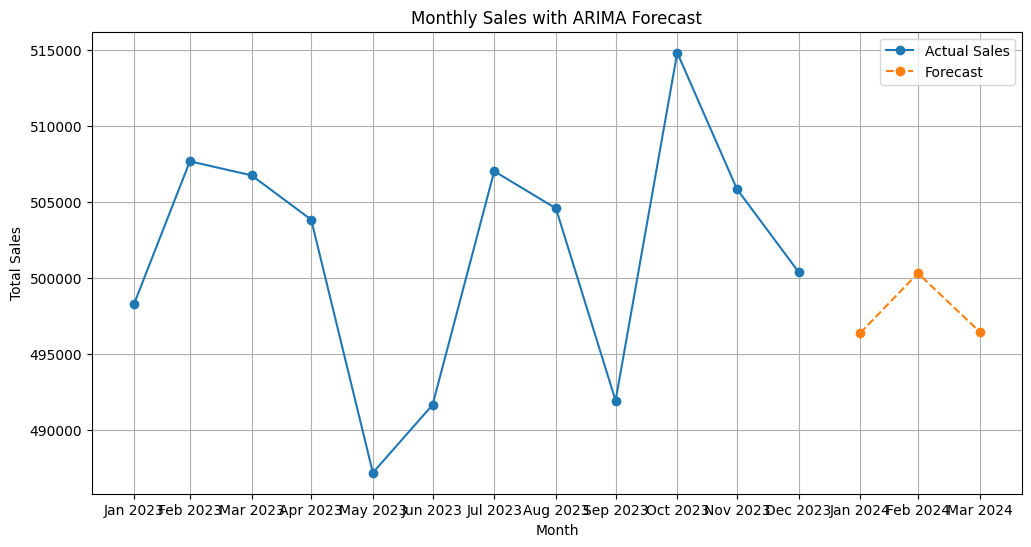

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Calculate monthly total sales
monthly_sales = df[sales_columns].sum()

# Create a DateTimeIndex for monthly sales
monthly_sales.index = pd.date_range(start='2023-01-01', periods=len(monthly_sales), freq='M')

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))
try:
    model_fit = model.fit()
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")

# Forecast future sales
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Create DateTimeIndex for forecast
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Plot the actual sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', marker='o')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Monthly Sales with ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(list(monthly_sales.index) + list(forecast_index),
           [f'{i.strftime("%b %Y")}' for i in list(monthly_sales.index) + list(forecast_index)])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pip install -q plotly dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output

# Load the cleaned data
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_columns].sum(axis=1)

# Calculate monthly sales
monthly_sales = df[sales_columns].sum().reset_index()
monthly_sales.columns = ['month', 'sales']
monthly_sales['month'] = monthly_sales['month'].apply(lambda x: int(x.split('_')[-1]))

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("E-Commerce Sales Dashboard"),

    # Dropdown for selecting the category
    html.Label("Select Category:"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in df['category'].unique()],
        value=df['category'].unique()[0]
    ),

    # Line chart for monthly sales trend
    dcc.Graph(id='monthly-sales-trend'),

    # Bar chart for total sales by product
    dcc.Graph(id='total-sales-by-product'),

    # Box plot for price distribution by category
    dcc.Graph(id='price-distribution-by-category'),

    # Scatter plot for review score vs total sales
    dcc.Graph(id='review-vs-sales')
])

@app.callback(
    Output('monthly-sales-trend', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_monthly_sales_trend(selected_category):
    filtered_df = df[df['category'] == selected_category]
    category_sales = filtered_df[sales_columns].sum().reset_index()
    category_sales.columns = ['month', 'sales']
    category_sales['month'] = category_sales['month'].apply(lambda x: int(x.split('_')[-1]))
    fig = px.line(category_sales, x='month', y='sales', title='Monthly Sales Trend')
    return fig

@app.callback(
    Output('total-sales-by-product', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_total_sales_by_product(selected_category):
    filtered_df = df[df['category'] == selected_category]
    fig = px.bar(filtered_df, x='product_name', y='total_sales', title='Total Sales by Product')
    return fig

@app.callback(
    Output('price-distribution-by-category', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_price_distribution(selected_category):
    filtered_df = df[df['category'] == selected_category]
    fig = px.box(filtered_df, x='category', y='price', title='Price Distribution by Category')
    return fig

@app.callback(
    Output('review-vs-sales', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_review_vs_sales(selected_category):
    filtered_df = df[df['category'] == selected_category]
    fig = px.scatter(filtered_df, x='review_score', y='total_sales', title='Review Score vs Total Sales', color='category')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>